Max draw down of soft payouts: 24.94915091092146
% of positive clv: 0.5341614906832298
count    483.000000
mean       0.057095
std        0.341567
min       -0.730120
25%       -0.163372
50%        0.034956
75%        0.263808
max        1.215909
dtype: float64
Expected/Actual wins: 109.33184125980564/113
Win percentage: 0.23395445134575568


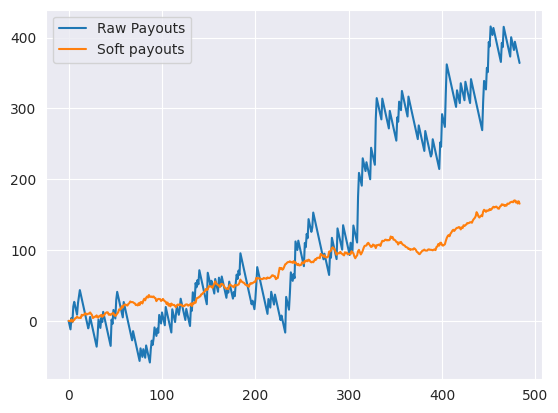

In [2]:
from util.stats_calculator import get_max_draw_down
from typing import List
from util.plot import plot_wealth_growth
import pandas as pd
from Model.Betting.evaluate import get_payout, LiveResult
import csv

def row_to_live_result(row: List[str]) -> LiveResult:
    return LiveResult(float(row[0]), float(row[1]), row[3]=="True", stakes=float(row[2]))

with open('live_results.csv', newline='') as csvfile:
    live_result_reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    live_results = [row_to_live_result(row) for row in live_result_reader]

clvs = [result.clv for result in live_results]
soft_payouts = [result.clv * result.stakes for result in live_results]
print(f"Max draw down of soft payouts: {get_max_draw_down(soft_payouts)}")
positive_clv_percentage = len([1 for payout in soft_payouts if payout > 0]) / len(soft_payouts)
print(f"% of positive clv: {positive_clv_percentage}")

payouts = [get_payout(result, result.stakes) for result in live_results]
print(pd.Series(clvs).describe())

expected_wins = sum([1 / live_result.starting_odds for live_result in live_results])
n_wins = sum([1 for live_result in live_results if live_result.has_won])
print(f"Expected/Actual wins: {expected_wins}/{n_wins}")
print(f"Win percentage: {n_wins / len(live_results)}")

plot_wealth_growth(payouts, label="Raw Payouts")
plot_wealth_growth(soft_payouts, label="Soft payouts")

8.0
8.024000000000001
8.1138688
8.142105063424001
8.082179170157199
8.009762844792592
7.94568474203425
7.960622629349275
8.123337755893173
7.827648261578662
7.822325460760788
8.090474777555668
8.111510011977312
8.13746684401564
8.12216840634889
8.238477857927807
8.303397063448278
8.333953564641769
8.33462028092694
8.501979456167952
8.188426453824478
8.715106043334469
8.722078128169136
8.828836364457926
9.860044451826612
10.04383568040866
9.711585596100742
9.687112400398568
10.072659473934431
9.871206284455742
Lowest bankroll: 1955.581365190197


<AxesSubplot:>

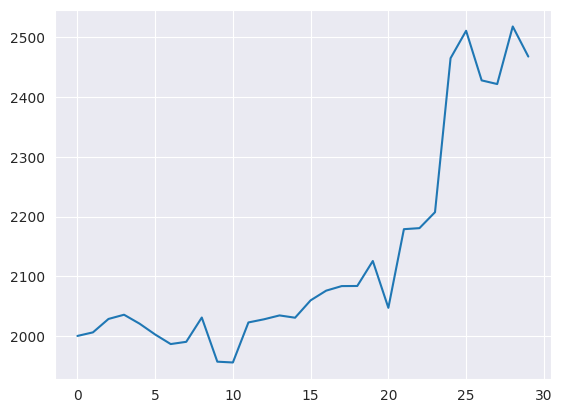

In [3]:
import csv
import seaborn as sns

STAKING_FRACTION = 0.004
bankroll = 2000
bankroll_snapshots = []

current_staking_size = max(STAKING_FRACTION * bankroll, 6)

with open('live_results.csv', newline='') as csvfile:
    live_result_reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    profit_of_day = 0
    for row in live_result_reader:
        is_new_day = int(row[4]) == 1
        
        if is_new_day:
            bankroll += profit_of_day
            bankroll_snapshots.append(bankroll)
            profit_of_day = 0
            current_staking_size = max(STAKING_FRACTION * bankroll, 6)
            print(current_staking_size)
        
        offer_odds = float(row[0])
        has_won = row[3]=="True"
        
        profit_of_day -= current_staking_size
        if has_won:
            profit_of_day += offer_odds * current_staking_size

print(f"Lowest bankroll: {min(bankroll_snapshots)}")
sns.lineplot(bankroll_snapshots)

PearsonRResult(statistic=0.09294754783696313, pvalue=0.04116526167602958)

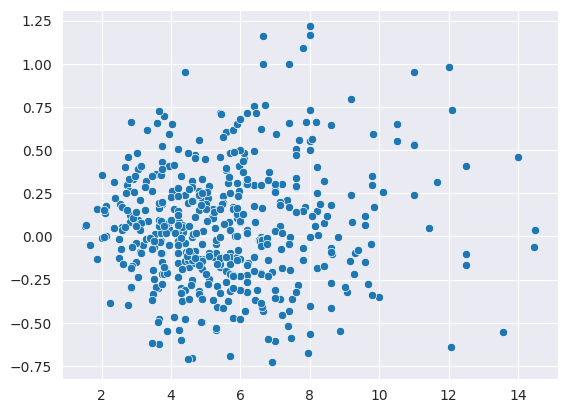

In [4]:
from scipy.stats import pearsonr
import seaborn as sns

offer_odds = [result.offer_odds for result in live_results]
sns.scatterplot(x=offer_odds, y=clvs)

pearsonr(x=offer_odds, y=clvs)